In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import zipfile
from cycler import cycler

# global plotting settings
plt.style.use(['ggplot'])

default_cycler = (plt.rcParams['axes.prop_cycle'][:4]  +
                  cycler(linestyle=['-', '--', ':', '-.']))

plt.rcParams.update({'axes.grid' : True, 
                     'axes.facecolor' : 'white', 
                     'axes.edgecolor' : '.15',
                     'axes.labelcolor' : 'black',
                     'lines.marker' : '.',
                     'lines.linestyle' : 'None',
                     'grid.color' : '.8',
                     'axes.prop_cycle' : default_cycler,
                     'figure.figsize' : (15, 5)
                    })

# plt.rc('axes', prop_cycle=default_cycler)

In [2]:
def extract_ghg(path = './7500-IU/'):
    '''Extracts contents of .ghg files (.data and .metadata files and SmartFlux folders) to same directory'''
    # filepaths_ghg = [f for f in os.listdir(path) if f.endswith('.ghg')]

    filepaths_ghg = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.ghg'):
                filepaths_ghg.append(os.path.join(root, file))

    print(filepaths_ghg)

    for fp in filepaths_ghg:
    #     fp = os.path.join(path, fn)
        with zipfile.ZipFile(fp, "r") as zip_ref:
            zip_ref.extractall(os.path.splitext(fp)[0])

In [5]:
extract_ghg(path = './7500-IU/08022022/raw/2022/07')

['./7500-IU/08022022/raw/2022/07/2022-07-18T183000_AIU-2189.ghg', './7500-IU/08022022/raw/2022/07/2022-07-17T043000_AIU-2189.ghg', './7500-IU/08022022/raw/2022/07/2022-07-17T023000_AIU-2189.ghg', './7500-IU/08022022/raw/2022/07/2022-07-16T080000_AIU-2189.ghg', './7500-IU/08022022/raw/2022/07/2022-07-19T000000_AIU-2189.ghg', './7500-IU/08022022/raw/2022/07/2022-07-28T200000_AIU-2189.ghg', './7500-IU/08022022/raw/2022/07/2022-07-22T070000_AIU-2189.ghg', './7500-IU/08022022/raw/2022/07/2022-07-20T043000_AIU-2189.ghg', './7500-IU/08022022/raw/2022/07/2022-07-15T230000_AIU-2189.ghg', './7500-IU/08022022/raw/2022/07/2022-07-21T083000_AIU-2189.ghg', './7500-IU/08022022/raw/2022/07/2022-07-17T180000_AIU-2189.ghg', './7500-IU/08022022/raw/2022/07/2022-07-28T220000_AIU-2189.ghg', './7500-IU/08022022/raw/2022/07/2022-07-31T223000_AIU-2189.ghg', './7500-IU/08022022/raw/2022/07/2022-07-21T203000_AIU-2189.ghg', './7500-IU/08022022/raw/2022/07/2022-07-24T150000_AIU-2189.ghg', './7500-IU/08022022/raw/

## Aggregate data files from many directories

In [7]:
# df_raw = read_eddy_raw('./7500-IU/06162022/raw/2022/06/', filestr = '2022-06-10T')

In [3]:
def read_eddy_fluxnet(path = './processed/'):
    filepaths = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.csv'):
                if file.__contains__('eddypro_atmos_fluxnet'):
                    if file.__contains__('2022-06-24') or file.__contains__('2022-07-15') or file.__contains__('2022-08-30') or file.__contains__('2022-10-01') or file.__contains__('2022-10-04'):
                        filepaths.append(os.path.join(root, file))
    # [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser("~/files")) for f in fn]

    filepaths.sort()
    print(filepaths)
    def r(i):
        return pd.read_csv(i, header=0)

    # df = pd.read_csv(filepaths[0])
    df = pd.concat(map(r, filepaths[:]))
    
    df = (df.replace(-9999, np.nan)
        .assign(date = lambda x: pd.to_datetime(x['TIMESTAMP_START'],
                                                format='%Y%m%d%H%M'))
        .set_index('date')
        .sort_index()
     )
    
    return df

In [9]:
def read_eddy_full(path = './processed/'):
    filepaths = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.csv'):
                if file.__contains__('eddypro_atmos_full_output'):
                    filepaths.append(os.path.join(root, file))
    # [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser("~/files")) for f in fn]

    filepaths.sort()
    
    def r(i):
        return pd.read_csv(i, header=0, skiprows=[0,2], parse_dates=[['date', 'time']])

    # df = pd.read_csv(filepaths[0])
    df = pd.concat(map(r, filepaths[:]))
    
    df = (df.replace(-9999, np.nan)
        .set_index('date_time')
        .sort_index()
     )
    
    return df

In [10]:
def read_eddy_stats(path = './processed/20220621', levels = 7, folderstr = 'eddypro_stats', filestr = 'eddypro_atmos_st'):
    filepaths = []
    for root, dirs, files in os.walk(path):
            for file in files:
                if file.endswith('.csv'):
                    if file.__contains__(filestr):
                        filepaths.append(os.path.join(root, file))
# [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser("~/files")) for f in fn]

    filepaths.sort()
    print(filepaths)
    def r(i):
        return pd.read_csv(i, header=1, parse_dates=[['date', 'time']])

    # df = pd.read_csv(filepaths[0])
    df = pd.concat(map(r, filepaths[:]))
    
    df = (df.replace(-9999, np.nan)
        .set_index('date_time')
        .sort_index()
     )
    
    return df

In [5]:
df = read_eddy_fluxnet('./processed/')

['./processed/20220624/eddypro_atmos_fluxnet_2022-06-24T070349_adv.csv', './processed/20220715/eddypro_atmos_fluxnet_2022-07-15T122658_exp.csv', './processed/20220829/eddypro_atmos_fluxnet_2022-08-30T001140_exp.csv', './processed/20220830/eddypro_atmos_fluxnet_2022-08-30T075857_exp.csv', './processed/20221001/eddypro_atmos_fluxnet_2022-10-01T005737_exp.csv', './processed/20221004/eddypro_atmos_fluxnet_2022-10-04T190557_exp.csv']


In [6]:
df

,TIMESTAMP_START,TIMESTAMP_END,DOY_START,DOY_END,FILENAME_HF,SW_IN_POT,NIGHT,EXPECT_NR,FILE_NR,CUSTOM_FILTER_NR,...,CUSTOM_CH4_MEAN,CUSTOM_RSSI_77_MEAN,CUSTOM_CH4_AUX-1_MEAN,CUSTOM_CH4_AUX-2_MEAN,CUSTOM_CH4_AUX-3_MEAN,CUSTOM_CH4_AUX-4_MEAN,CUSTOM_CH4_TC_1_MEAN,CUSTOM_CH4_TC_2_MEAN,CUSTOM_CH4_TC_3_MEAN,NUM_BIOMET_VARS
date,,,,,,,,,,,,,,,,,,,,,
2022-05-24 11:30:00,202205241130,202205241200,144.4790,144.4999,not_enough_data,1240.990,0,NaN,NaN,NaN,...,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-24 12:00:00,202205241200,202205241230,144.4999,144.5207,2022-05-24T120000_AIU-2189.ghg,1248.990,0,18000.0,18000.0,18000.0,...,2.05028,22.35580,0.000018,0.000010,0.000019,0.000010,9999.99,9999.99,9999.99,0.0
2022-05-24 12:30:00,202205241230,202205241300,144.5207,144.5415,2022-05-24T123000_AIU-2189.ghg,1240.990,0,18000.0,18000.0,18000.0,...,2.03068,22.50430,0.000028,0.000012,0.000030,0.000013,9999.99,9999.99,9999.99,0.0
2022-05-24 13:00:00,202205241300,202205241330,144.5415,144.5624,2022-05-24T130000_AIU-2189.ghg,1217.130,0,18000.0,18000.0,18000.0,...,2.03008,23.06830,0.000021,0.000011,0.000022,0.000011,9999.99,9999.99,9999.99,0.0
2022-05-24 13:30:00,202205241330,202205241400,144.5624,144.5832,2022-05-24T133000_AIU-2189.ghg,1177.830,0,18000.0,18000.0,18000.0,...,2.01265,23.07270,0.000025,0.000014,0.000026,0.000015,9999.99,9999.99,9999.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-04 08:30:00,202210040830,202210040900,277.3541,277.3749,2022-10-04T083000_AIU-2189.ghg,557.892,0,18000.0,18000.0,18000.0,...,1.57277,1.05232,0.000016,0.000000,0.000026,0.000000,9999.99,9999.99,9999.99,0.0
2022-10-04 09:00:00,202210040900,202210040930,277.3749,277.3957,2022-10-04T090000_AIU-2189.ghg,658.404,0,18000.0,18000.0,18000.0,...,1.69342,1.12188,0.000014,0.000001,0.000021,0.000004,9999.99,9999.99,9999.99,0.0
2022-10-04 09:30:00,202210040930,202210041000,277.3957,277.4166,2022-10-04T093000_AIU-2189.ghg,746.551,0,18000.0,18000.0,18000.0,...,1.64512,1.21406,0.000031,0.000011,0.000039,0.000016,9999.99,9999.99,9999.99,0.0


In [7]:
fp = '/home/otto/data/atmos-flux-data/output/atmos-fluxnet-20221004.csv'
df.to_csv(fp)

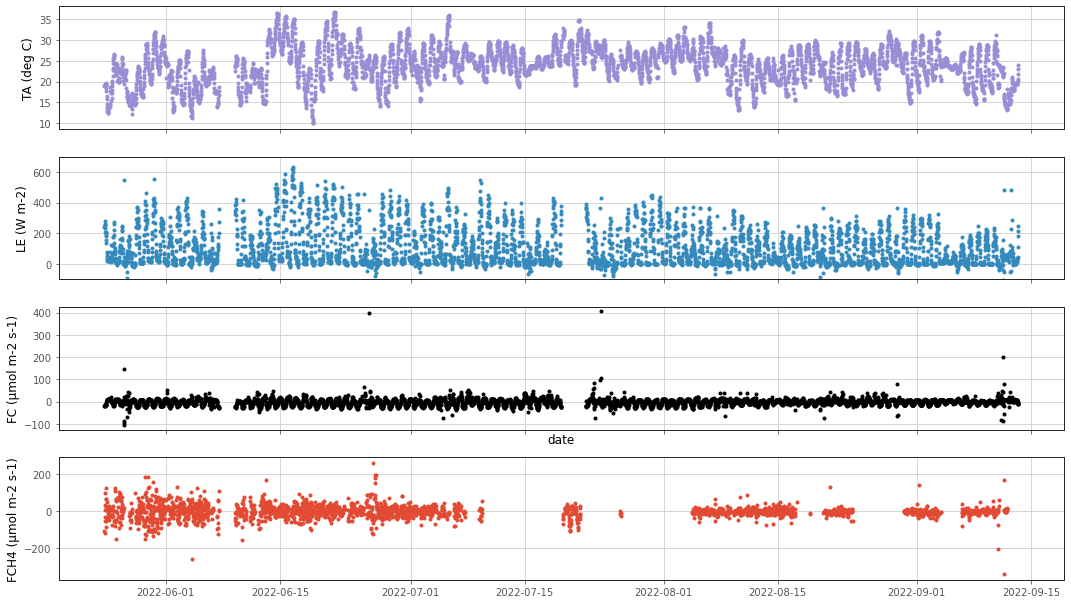

In [6]:
dfp = df.loc[:, ['TA_EP', 'LE', 'FC', 'FCH4']]

fig, ax = plt.subplots(4,1, figsize = (15, 8.5), sharex = True)

ax[3].plot(dfp['FCH4'], color = list(plt.rcParams['axes.prop_cycle'])[0]['color'], linestyle='None')
ax[3].set(ylabel = 'FCH4 (µmol m-2 s-1)')

ax[1].plot(dfp['LE'], color = list(plt.rcParams['axes.prop_cycle'])[1]['color'], linestyle='None')
ax[1].set(ylabel = 'LE (W m-2)', ylim = [-100, 700])

ax[0].plot(dfp['TA_EP'], color = list(plt.rcParams['axes.prop_cycle'])[2]['color'], linestyle='None')
ax[0].set(ylabel = 'TA (deg C)')

ax[2].plot(dfp['FC'], color = 'k', linestyle='None')
ax[2].set(ylabel = 'FC (µmol m-2 s-1)', xlabel = 'date', ylim = [-125, 425])
plt.tight_layout()

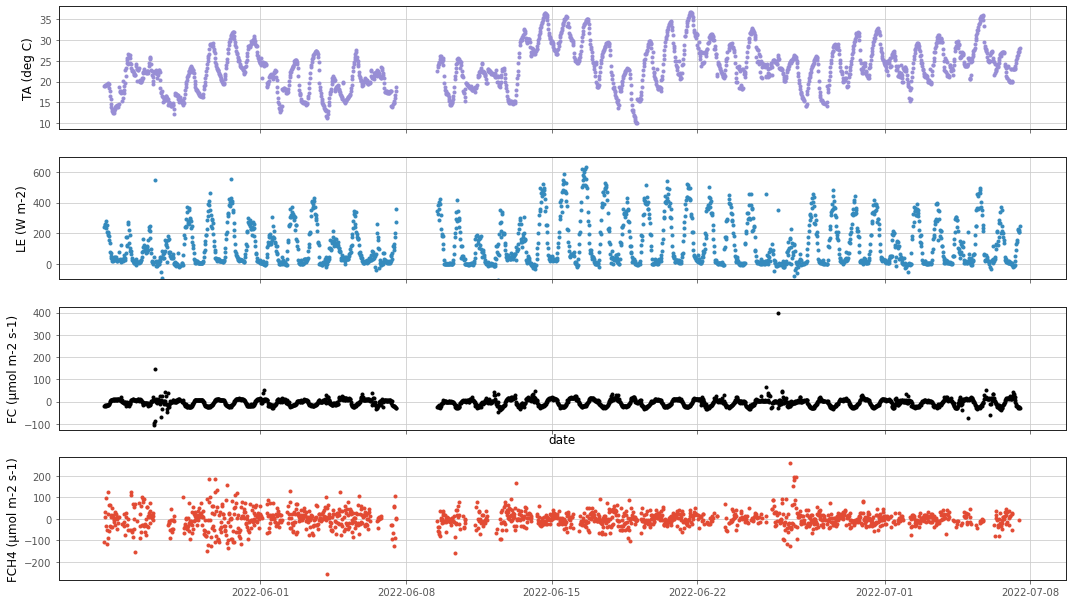

In [41]:
dfp = df.loc['2022-05':'2022-07-07 12:00', ['TA_EP', 'LE', 'FC', 'FCH4']]

fig, ax = plt.subplots(4,1, figsize = (15, 8.5), sharex = True)

ax[3].plot(dfp['FCH4'], color = list(plt.rcParams['axes.prop_cycle'])[0]['color'], linestyle='None')
ax[3].set(ylabel = 'FCH4 (µmol m-2 s-1)')

ax[1].plot(dfp['LE'], color = list(plt.rcParams['axes.prop_cycle'])[1]['color'], linestyle='None')
ax[1].set(ylabel = 'LE (W m-2)', ylim = [-100, 700])

ax[0].plot(dfp['TA_EP'], color = list(plt.rcParams['axes.prop_cycle'])[2]['color'], linestyle='None')
ax[0].set(ylabel = 'TA (deg C)')

ax[2].plot(dfp['FC'], color = 'k', linestyle='None')
ax[2].set(ylabel = 'FC (µmol m-2 s-1)', xlabel = 'date', ylim = [-125, 425])
plt.tight_layout()

In [108]:
df_flux.loc[:, 'FCH4'].sum()

-1338.80951512

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

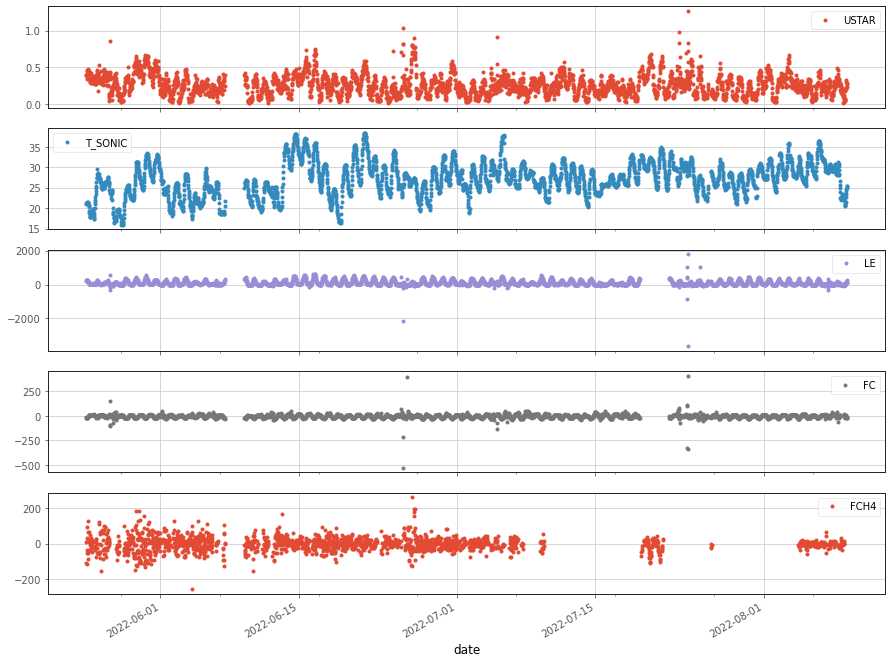

In [6]:
df_flux.loc[:, ['USTAR', 'T_SONIC', 'LE', 'FC', 'FCH4']].plot(linestyle='None', subplots = True, figsize = (15,12))

In [110]:
df_flux.loc['2022-06-17':, 'FCH4'].mean()

-0.7807912310756979

In [111]:
np.sqrt(df_flux.loc['2022-06-17':, 'FCH4'].var())

29.77985277213583

In [ ]:
df_raw.loc[:, ['CO2 (umol/mol)']].plot(legend = True, subplots=True)

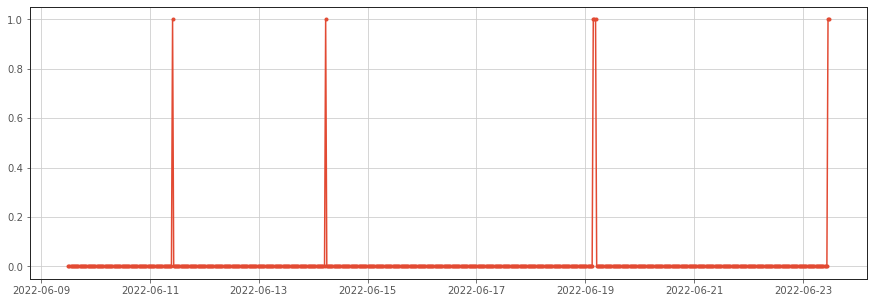

In [93]:
plt.plot(df_flux.loc['2022-06-09 12':, 'U'].isna())

In [95]:
df_flux.loc['2022-06-09 12':, 'U']

date
2022-06-09 12:00:00    3.32586
2022-06-09 12:30:00    2.76767
2022-06-09 13:00:00    2.64339
2022-06-09 13:30:00    3.07745
2022-06-09 14:00:00    3.10632
                        ...   
2022-06-23 09:30:00    1.61118
2022-06-23 10:00:00    1.53223
2022-06-23 10:30:00    1.79222
2022-06-23 11:00:00        NaN
2022-06-23 11:30:00        NaN
Name: U, Length: 672, dtype: float64

In [41]:
df_raw = read_eddy_raw('./7500-IU/06162022/raw/2022/06/', filestr = '2022-06-11T')

['./7500-IU/06162022/raw/2022/06/2022-06-11T000000_AIU-2189/2022-06-11T000000_AIU-2189.data', './7500-IU/06162022/raw/2022/06/2022-06-11T003000_AIU-2189/2022-06-11T003000_AIU-2189.data', './7500-IU/06162022/raw/2022/06/2022-06-11T010000_AIU-2189/2022-06-11T010000_AIU-2189.data', './7500-IU/06162022/raw/2022/06/2022-06-11T013000_AIU-2189/2022-06-11T013000_AIU-2189.data', './7500-IU/06162022/raw/2022/06/2022-06-11T020000_AIU-2189/2022-06-11T020000_AIU-2189.data', './7500-IU/06162022/raw/2022/06/2022-06-11T023000_AIU-2189/2022-06-11T023000_AIU-2189.data', './7500-IU/06162022/raw/2022/06/2022-06-11T030000_AIU-2189/2022-06-11T030000_AIU-2189.data', './7500-IU/06162022/raw/2022/06/2022-06-11T033000_AIU-2189/2022-06-11T033000_AIU-2189.data', './7500-IU/06162022/raw/2022/06/2022-06-11T040000_AIU-2189/2022-06-11T040000_AIU-2189.data', './7500-IU/06162022/raw/2022/06/2022-06-11T043000_AIU-2189/2022-06-11T043000_AIU-2189.data', './7500-IU/06162022/raw/2022/06/2022-06-11T050000_AIU-2189/2022-06-11

In [42]:
# df_raw = read_eddy_raw('./7500-IU/06162022/raw/2022/06/2022-06-11T100000_AIU-2189/')

array([<AxesSubplot:xlabel='Date_Time'>], dtype=object)

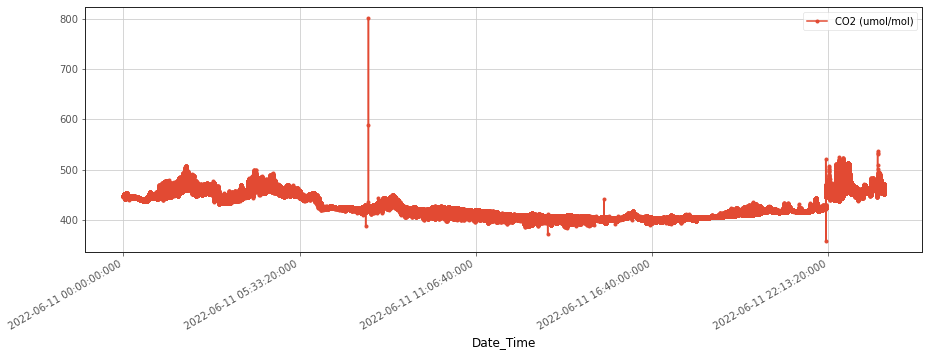

In [46]:
df_raw.loc[:, ['CO2 (umol/mol)']].plot(legend = True, subplots=True)

<AxesSubplot:xlabel='Date_Time'>

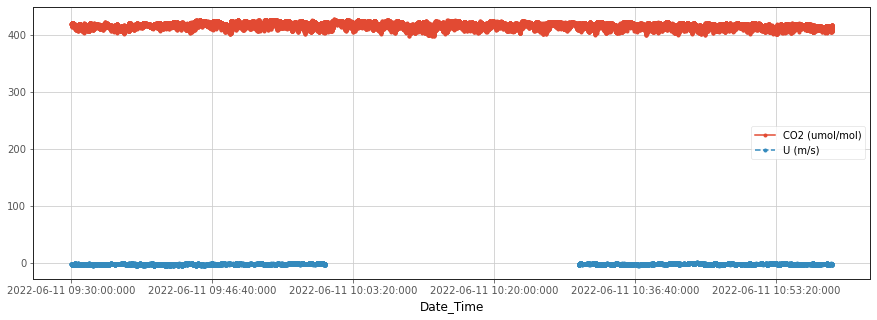

In [55]:
df_raw.loc['2022-06-11 09:30':'2022-06-11 11:00', ['CO2 (umol/mol)', 'U (m/s)']].plot()

array([<AxesSubplot:xlabel='Date_Time'>, <AxesSubplot:xlabel='Date_Time'>,
       <AxesSubplot:xlabel='Date_Time'>, <AxesSubplot:xlabel='Date_Time'>,
       <AxesSubplot:xlabel='Date_Time'>], dtype=object)

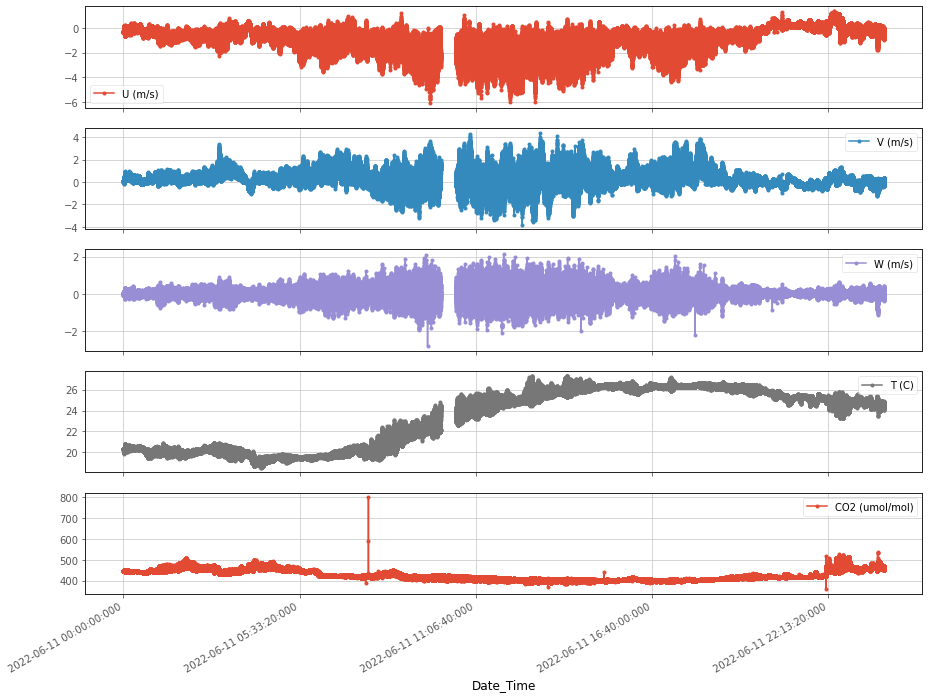

In [57]:
df_raw.loc[:, ['U (m/s)', 'V (m/s)', 'W (m/s)', 'T (C)', 'CO2 (umol/mol)']].plot(legend = True, subplots=True, figsize = (15,12))

<AxesSubplot:xlabel='Date_Time'>

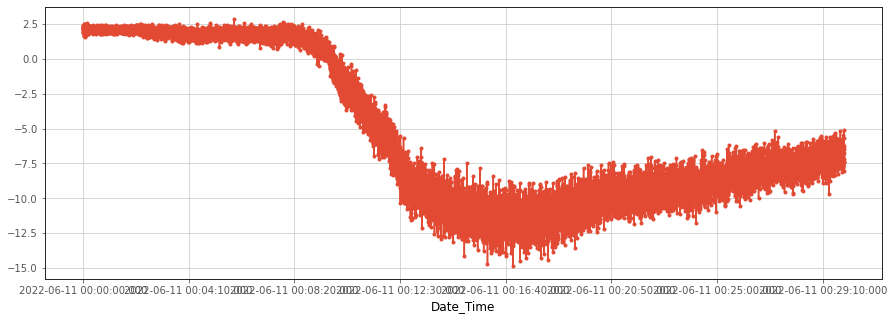

In [172]:
df_raw.loc[:, 'CH4 (umol/mol)'].plot()

In [100]:
df_raw = read_eddy_raw('./7500-IU/06162022/raw/2022/06/', filestr = '2022-06-11T150000')

['./7500-IU/06162022/raw/2022/06/2022-06-11T150000_AIU-2189/2022-06-11T150000_AIU-2189.data']


<AxesSubplot:xlabel='Date_Time'>

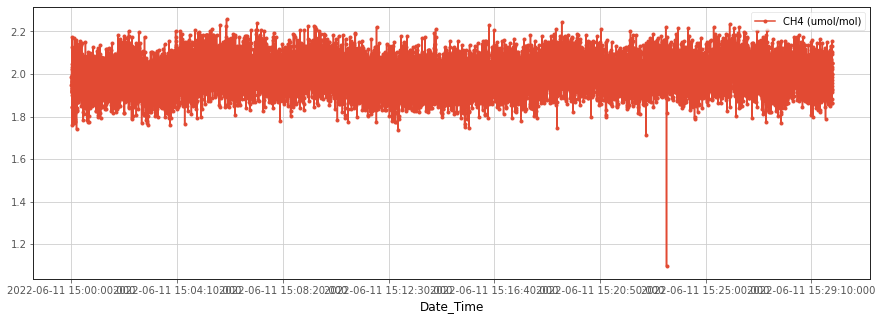

In [101]:
df_raw.loc[:, ['CH4 (umol/mol)']].plot(legend = True)

In [98]:
df_raw = read_eddy_raw('./7500-IU/06162022/raw/2022/06/', filestr = '2022-06-11T153000')

['./7500-IU/06162022/raw/2022/06/2022-06-11T153000_AIU-2189/2022-06-11T153000_AIU-2189.data']


<AxesSubplot:xlabel='Date_Time'>

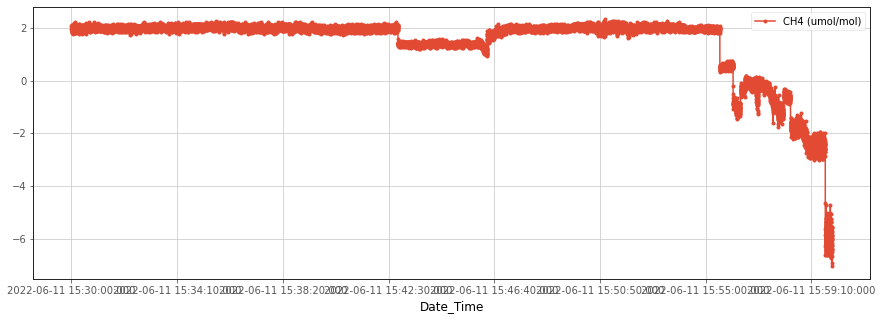

In [99]:
df_raw.loc[:, ['CH4 (umol/mol)']].plot(legend = True)

In [92]:
df_raw = read_eddy_raw('./7500-IU/06162022/raw/2022/06/', filestr = '2022-06-11T160000')

['./7500-IU/06162022/raw/2022/06/2022-06-11T160000_AIU-2189/2022-06-11T160000_AIU-2189.data']


<AxesSubplot:xlabel='Date_Time'>

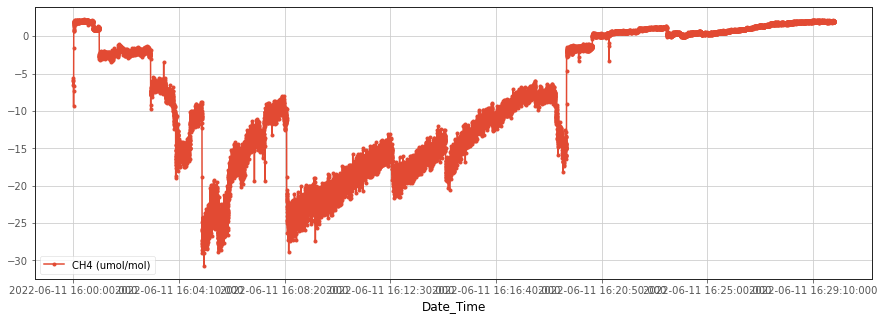

In [93]:
df_raw.loc[:, ['CH4 (umol/mol)']].plot(legend = True)

In [104]:
df_raw = read_eddy_raw('./7500-IU/06162022/raw/2022/06/', filestr = '2022-06-11T163000')

['./7500-IU/06162022/raw/2022/06/2022-06-11T163000_AIU-2189/2022-06-11T163000_AIU-2189.data']


<AxesSubplot:xlabel='Date_Time'>

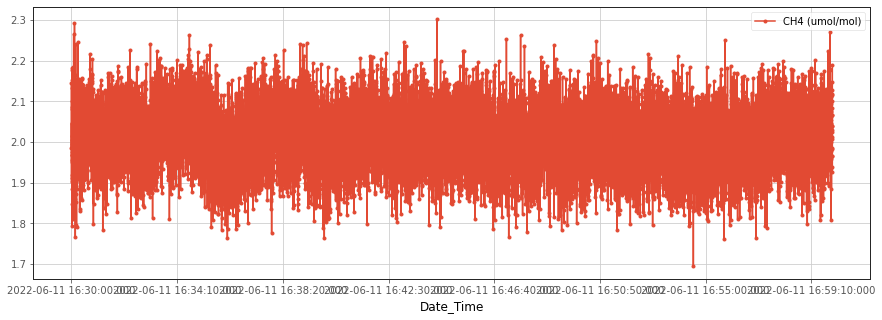

In [105]:
df_raw.loc[:, ['CH4 (umol/mol)']].plot(legend = True)

In [90]:
df_raw

,DATAH,Seconds,Nanoseconds,Sequence Number,Diagnostic Value,Diagnostic Value 2,CO2 Absorptance,H2O Absorptance,CO2 (mmol/m^3),CO2 (mg/m^3),...,CH4 Auxiliary Input 1,CH4 Auxiliary Input 2,CH4 Auxiliary Input 3,CH4 Auxiliary Input 4,CH4 Thermocouple Input 1,CH4 Thermocouple Input 2,CH4 Thermocouple Input 3,CH4 Diagnostic Value,CH4 Drop Rate (%),CHK
Date_Time,,,,,,,,,,,,,,,,,,,,,
2022-06-11 14:00:00:000,DATA,1654974000,0,54337212,255,1,0.132064,0.085980,16.1865,712.204,...,0.000078,3.916780e-05,0.000118,7.833550e-05,9999.99,9999.99,9999.99,15,0,69
2022-06-11 14:00:00:100,DATA,1654974000,100000000,54337242,255,1,0.132044,0.086033,16.1834,712.071,...,0.000118,-1.226000e-09,0.000118,1.175030e-04,9999.99,9999.99,9999.99,15,0,124
2022-06-11 14:00:00:200,DATA,1654974000,200000000,54337272,255,1,0.132214,0.085721,16.2105,713.261,...,0.000118,7.833430e-05,0.000118,1.175030e-04,9999.99,9999.99,9999.99,15,0,243
2022-06-11 14:00:00:300,DATA,1654974000,300000000,54337302,255,1,0.131934,0.086238,16.1655,711.281,...,0.000078,3.916780e-05,0.000078,7.833550e-05,9999.99,9999.99,9999.99,15,0,92
2022-06-11 14:00:00:400,DATA,1654974000,400000000,54337332,255,1,0.131887,0.086309,16.1582,710.962,...,0.000118,3.916780e-05,0.000039,3.916650e-05,9999.99,9999.99,9999.99,543,0,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-11 14:29:59:500,DATA,1654975799,500000000,54877062,255,1,0.132043,0.085253,16.1892,712.325,...,0.000078,0.000000e+00,0.000078,-1.226000e-09,9999.99,9999.99,9999.99,15,0,16
2022-06-11 14:29:59:600,DATA,1654975799,600000000,54877092,255,1,0.132045,0.085264,16.1893,712.329,...,0.000118,7.833550e-05,0.000118,7.833550e-05,9999.99,9999.99,9999.99,15,0,119
2022-06-11 14:29:59:700,DATA,1654975799,700000000,54877122,255,1,0.131952,0.085466,16.1743,711.667,...,0.000118,3.916780e-05,0.000118,3.916650e-05,9999.99,9999.99,9999.99,15,0,86


<AxesSubplot:xlabel='Date_Time'>

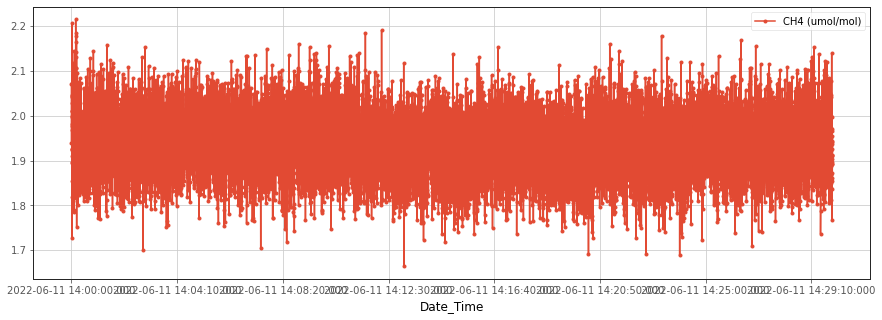

In [91]:
df_raw.loc[:, ['CH4 (umol/mol)']].plot(legend = True)

<AxesSubplot:xlabel='Date_Time'>

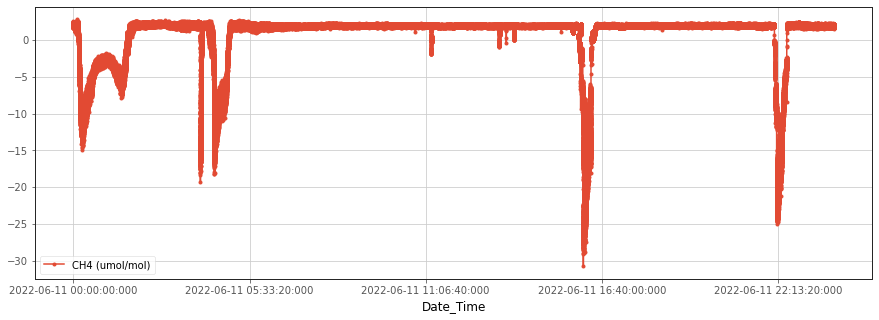

In [85]:
df_raw.loc[:, ['CH4 (umol/mol)']].plot(legend = True)

<AxesSubplot:xlabel='Date_Time'>

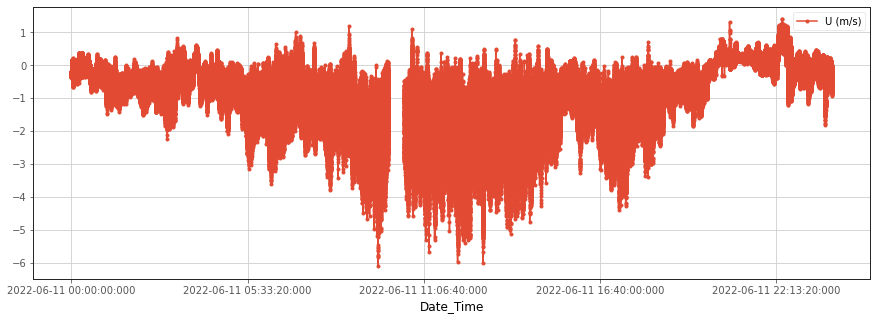

In [83]:
df_raw.loc[:, 'U (m/s)'].plot(legend = True)

<AxesSubplot:xlabel='date'>

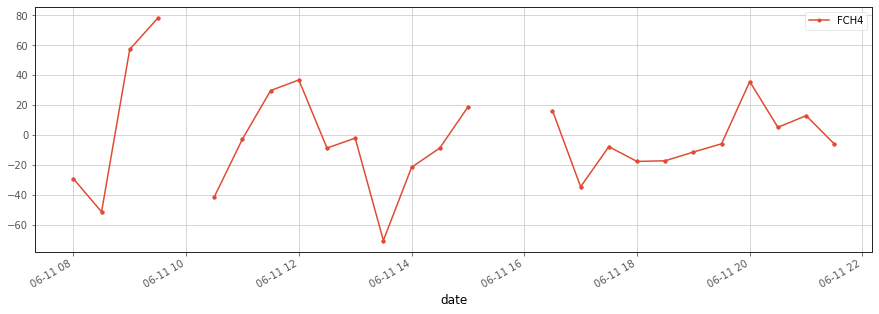

In [84]:
df_flux.loc['2022-06-11', 'FCH4'].plot(legend = True)

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

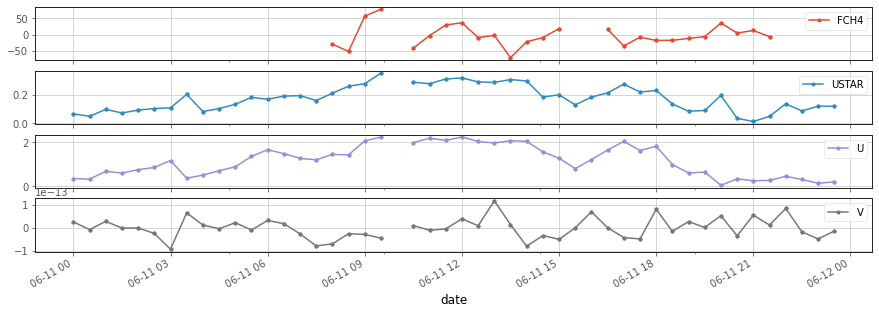

In [88]:
df_flux.loc['2022-06-11', ['FCH4', 'USTAR', 'U', 'V']].plot(subplots=True)

In [164]:
df_raw = read_eddy_raw('./7500-IU/06162022/raw/2022/06/2022-06-11T010000_AIU-2189/2022-06-11T010000_AIU-2189.data')

In [58]:
df_flux.columns[df_flux.columns.str.startswith('P')]

Index(['PA_EP', 'PA_CELL'], dtype='object')

In [175]:
df_raw = read_eddy_raw('./7500-IU/06162022/')

ValueError: No objects to concatenate

<AxesSubplot:xlabel='Date_Time'>

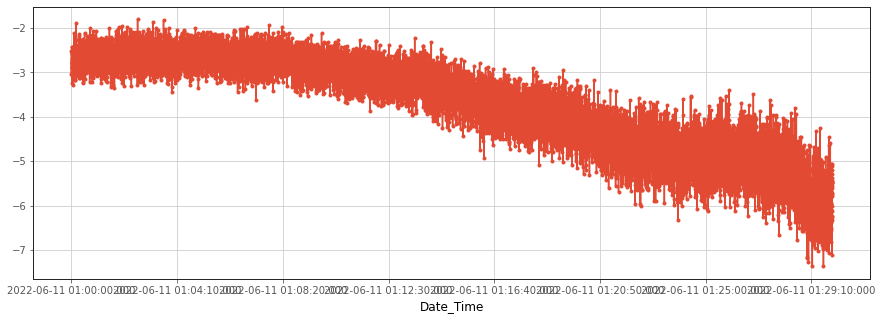

In [165]:
df_raw.loc[:, 'CH4 (umol/mol)'].plot()

<AxesSubplot:xlabel='Date_Time'>

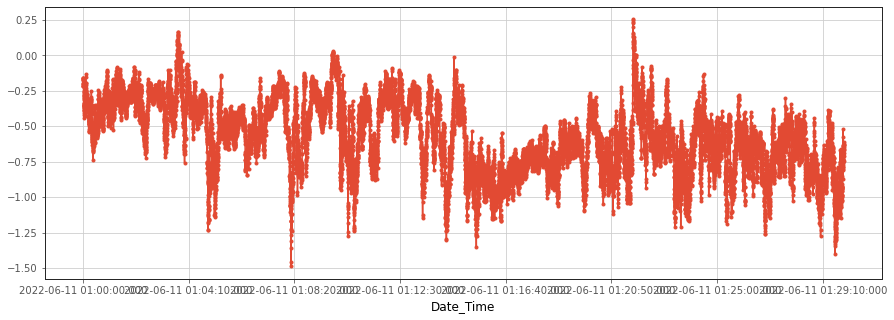

In [168]:
df_raw.loc[:, 'U (m/s)'].plot()

In [167]:
df_raw.columns

Index(['DATAH', 'Seconds', 'Nanoseconds', 'Sequence Number',
       'Diagnostic Value', 'Diagnostic Value 2', 'CO2 Absorptance',
       'H2O Absorptance', 'CO2 (mmol/m^3)', 'CO2 (mg/m^3)', 'H2O (mmol/m^3)',
       'H2O (g/m^3)', 'Temperature (C)', 'Pressure (kPa)',
       'Aux 1 - Auxiliary Input 1 (Other)',
       'Aux 2 - Auxiliary Input 2 (Other)',
       'Aux 3 - Auxiliary Input 3 (Other)',
       'Aux 4 - Auxiliary Input 4 (Other)', 'Cooler Voltage (V)',
       'Chopper Cooler Voltage (V)', 'Vin SmartFlux (V)', 'CO2 (umol/mol)',
       'H2O (mmol/mol)', 'Dew Point (C)', 'CO2 Signal Strength', 'H2O Sample',
       'H2O Reference', 'CO2 Sample', 'CO2 Reference', 'HIT Power (W)',
       'Vin HIT (V)', 'U (m/s)', 'V (m/s)', 'W (m/s)', 'T (C)',
       'Anemometer Diagnostics', 'CH4 Seconds', 'CH4 Nanoseconds',
       'CH4 (umol/mol)', 'CH4 (mmol/m^3)', 'CH4 Temperature', 'CH4 Pressure',
       'CH4 Signal Strength', 'CH4 Auxiliary Input 1', 'CH4 Auxiliary Input 2',
       'CH4 Auxiliar

In [119]:
df_stats

,filename,DOY,used_records,mean(u),mean(v),mean(w),mean(ts),mean(co2),mean(h2o),mean(ch4),...,kur(w),kur(ts),kur(co2),kur(h2o),kur(ch4),kur(none),kur(tc),kur(pc),kur(te),kur(pe)
date_time,,,,,,,,,,,,,,,,,,,,,
2022-05-24 12:30:00,2022-05-24T120000_AIU-2189.ghg,144.5207,18000,0.602807,-3.20755,0.066858,294.147,17.0623,372.572,0.085926,...,4.39160,3.61424,3.25440,3.52328,3.02709,NaN,NaN,NaN,4.78216,1.55531
2022-05-24 13:00:00,2022-05-24T123000_AIU-2189.ghg,144.5415,18000,0.638752,-3.13705,0.066813,294.323,17.0318,379.294,0.085073,...,4.79201,3.42791,2.88467,3.27385,2.87294,NaN,NaN,NaN,2.33654,2.35205
2022-05-24 13:30:00,2022-05-24T130000_AIU-2189.ghg,144.5624,18000,0.878345,-2.82938,0.060735,294.446,16.9549,373.150,0.084970,...,4.53205,3.47026,3.73937,3.46818,3.00656,NaN,NaN,NaN,3.20690,2.34663
2022-05-24 14:00:00,2022-05-24T133000_AIU-2189.ghg,144.5832,18000,0.838687,-2.35587,0.045510,294.507,16.9076,367.605,0.084224,...,4.44367,2.95997,2.92086,3.05160,2.97622,NaN,NaN,NaN,2.26981,2.64755
2022-05-24 14:30:00,2022-05-24T140000_AIU-2189.ghg,144.6040,18000,0.715299,-2.80810,0.053707,294.563,16.8699,360.318,0.085255,...,4.25424,3.55498,3.09258,3.17739,3.13462,NaN,NaN,NaN,3.17292,2.64968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-16 10:00:00,2022-06-16T093000_AIU-2189.ghg,167.4165,18000,-1.874600,1.98229,0.082836,303.686,16.3089,895.459,0.077853,...,4.05704,2.66064,3.21978,2.73049,3.06867,NaN,NaN,NaN,1.68482,2.71681
2022-06-16 10:30:00,2022-06-16T100000_AIU-2189.ghg,167.4374,18000,-2.174820,1.49722,0.069746,304.646,16.1948,871.294,0.076512,...,3.89806,2.81274,2.83327,3.19406,3.03231,NaN,NaN,NaN,2.21456,2.33294
2022-06-16 11:00:00,2022-06-16T103000_AIU-2189.ghg,167.4582,18000,-2.097570,2.00757,0.086254,305.465,16.1477,814.526,0.075872,...,4.30860,3.18533,2.81026,2.80771,2.99795,NaN,NaN,NaN,1.89727,2.60442


<AxesSubplot:xlabel='date_time'>

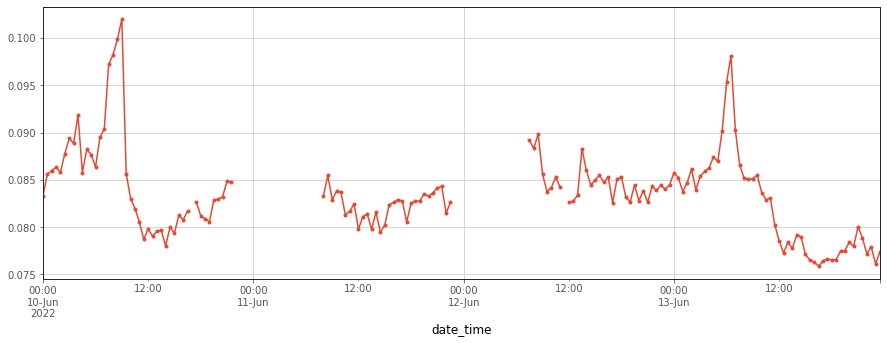

In [120]:
df_stats.loc['2022-06-10':'2022-06-13', 'mean(ch4)'].plot()

In [91]:
df.loc[:, df.columns.str.contains('ch4')]

,mean(ch4),var(ch4),cov(u/ch4),cov(v/ch4),cov(w/ch4),st_dev(ch4),skw(ch4),kur(ch4)
date_time,,,,,,,,
2022-05-24 12:30:00,0.085926,0.000004,0.000037,-3.348870e-06,-0.000148,0.002008,0.024448,3.02709
2022-05-24 12:30:00,0.085926,0.000004,0.000037,-3.348870e-06,-0.000148,0.002008,0.024448,3.02709
2022-05-24 12:30:00,0.085926,0.000004,0.000037,-3.254180e-06,-0.000148,0.002008,0.024448,3.02709
2022-05-24 12:30:00,0.085926,0.000004,0.000007,3.585940e-05,-0.000148,0.002008,0.024448,3.02709
2022-05-24 12:30:00,0.085926,0.000004,0.000037,-3.348870e-06,-0.000148,0.002008,0.024448,3.02709
...,...,...,...,...,...,...,...,...
2022-06-16 12:00:00,0.075285,0.000002,-0.000031,1.803210e-05,-0.000029,0.001265,0.058800,3.09065
2022-06-16 12:00:00,0.075285,0.000002,-0.000031,1.803210e-05,-0.000029,0.001265,0.058800,3.09065
2022-06-16 12:00:00,0.075285,0.000002,-0.000031,1.803210e-05,-0.000029,0.001265,0.058800,3.09065


array([<AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>],
      dtype=object)

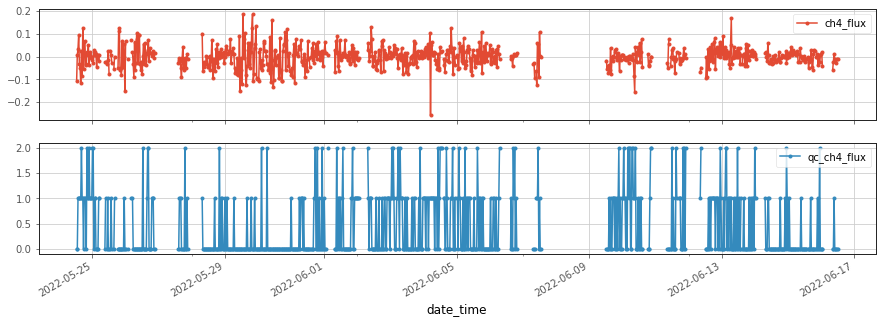

In [58]:
df.loc[:, ['ch4_flux', 'qc_ch4_flux']].plot(subplots=True)

In [7]:
df = (df.replace(-9999, np.nan)
        .assign(date = lambda x: pd.to_datetime(x['TIMESTAMP_START'],
                                                format='%Y%m%d%H%M'))
        .set_index('date')
        .sort_index()
     )

KeyError: 'TIMESTAMP_START'

In [9]:
df.U

date
2022-05-24 11:30:00        NaN
2022-05-24 12:00:00    3.26386
2022-05-24 12:30:00    3.20198
2022-05-24 13:00:00    2.96176
2022-05-24 13:30:00    2.50118
                        ...   
2022-06-16 09:30:00    2.72933
2022-06-16 10:00:00    2.64119
2022-06-16 10:30:00    2.90476
2022-06-16 11:00:00    3.07227
2022-06-16 11:30:00    3.36480
Name: U, Length: 1106, dtype: float64

In [63]:
df

,TIMESTAMP_START,TIMESTAMP_END,DOY_START,DOY_END,FILENAME_HF,SW_IN_POT,NIGHT,EXPECT_NR,FILE_NR,CUSTOM_FILTER_NR,...,CUSTOM_CH4_MEAN,CUSTOM_RSSI_77_MEAN,CUSTOM_CH4_AUX-1_MEAN,CUSTOM_CH4_AUX-2_MEAN,CUSTOM_CH4_AUX-3_MEAN,CUSTOM_CH4_AUX-4_MEAN,CUSTOM_CH4_TC_1_MEAN,CUSTOM_CH4_TC_2_MEAN,CUSTOM_CH4_TC_3_MEAN,NUM_BIOMET_VARS
date,,,,,,,,,,,,,,,,,,,,,
2022-05-24 11:30:00,202205241130,202205241200,144.4790,144.4999,not_enough_data,1240.99,0,NaN,NaN,NaN,...,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-24 11:30:00,202205241130,202205241200,144.4790,144.4999,not_enough_data,1240.99,0,NaN,NaN,NaN,...,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-24 12:00:00,202205241200,202205241230,144.4999,144.5207,2022-05-24T120000_AIU-2189.ghg,1248.99,0,18000.0,18000.0,18000.0,...,2.05028,22.3558,0.000018,0.000010,0.000019,0.000010,9999.99,9999.99,9999.99,0.0
2022-05-24 12:00:00,202205241200,202205241230,144.4999,144.5207,2022-05-24T120000_AIU-2189.ghg,1248.99,0,18000.0,18000.0,18000.0,...,2.05028,22.3558,0.000018,0.000010,0.000019,0.000010,9999.99,9999.99,9999.99,0.0
2022-05-24 12:30:00,202205241230,202205241300,144.5207,144.5415,2022-05-24T123000_AIU-2189.ghg,1240.99,0,18000.0,18000.0,18000.0,...,2.03068,22.5043,0.000028,0.000012,0.000030,0.000013,9999.99,9999.99,9999.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-16 10:30:00,202206161030,202206161100,167.4374,167.4582,2022-06-16T103000_AIU-2189.ghg,1193.00,0,18000.0,18000.0,18000.0,...,1.90140,14.1752,0.000065,0.000015,0.000074,0.000012,9999.99,9999.99,9999.99,0.0
2022-06-16 11:00:00,202206161100,202206161130,167.4582,167.4790,2022-06-16T110000_AIU-2189.ghg,1231.32,0,18000.0,18000.0,18000.0,...,1.89045,13.8745,0.000060,0.000011,0.000070,0.000008,9999.99,9999.99,9999.99,0.0
2022-06-16 11:00:00,202206161100,202206161130,167.4582,167.4790,2022-06-16T110000_AIU-2189.ghg,1231.32,0,18000.0,18000.0,18000.0,...,1.89045,13.8745,0.000060,0.000011,0.000070,0.000008,9999.99,9999.99,9999.99,0.0


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

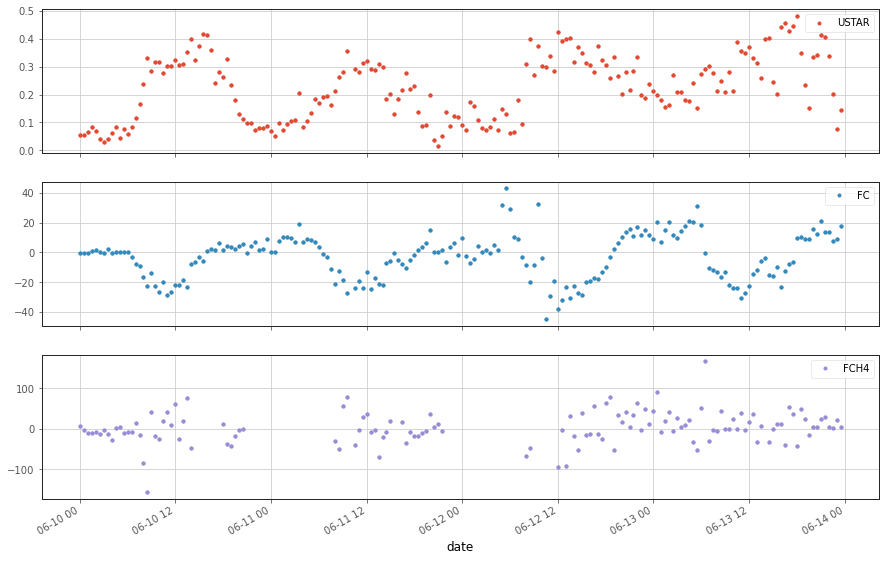

In [68]:
df.loc['2022-06-10':'2022-06-13', ['USTAR', 'FC', 'FCH4']].plot(subplots=True, figsize=(15,10), linestyle = 'None')

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

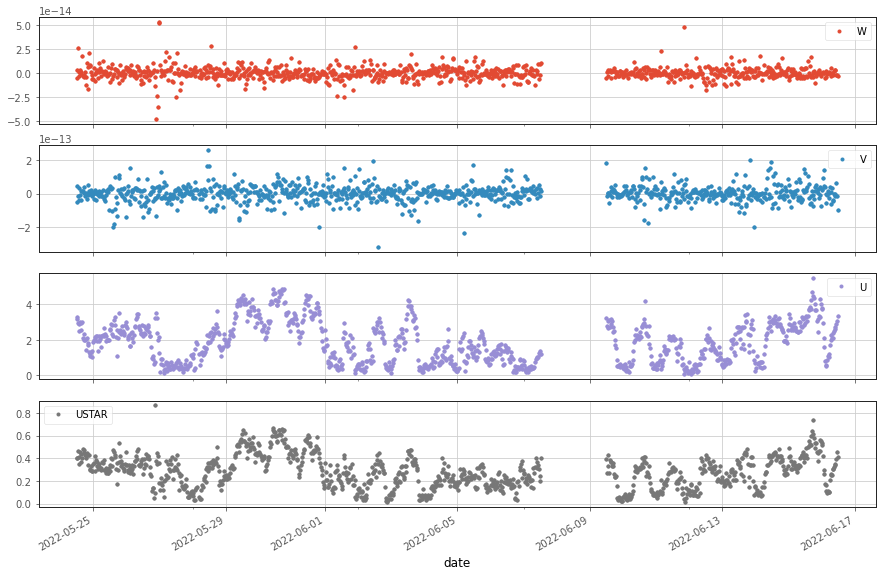

In [65]:
df.loc[:, ['W', 'V', 'U', 'USTAR']].plot(subplots=True, figsize=(15, 10), linestyle = 'None')

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

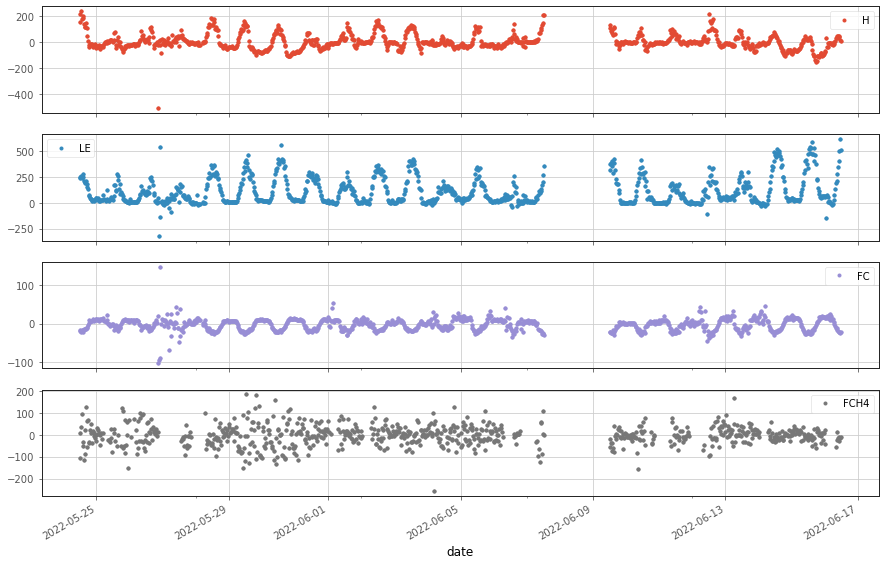

In [66]:
df.loc[:, ['H', 'LE', 'FC', 'FCH4']].plot(subplots=True, figsize=(15,10), linestyle = 'None')

<AxesSubplot:xlabel='date'>

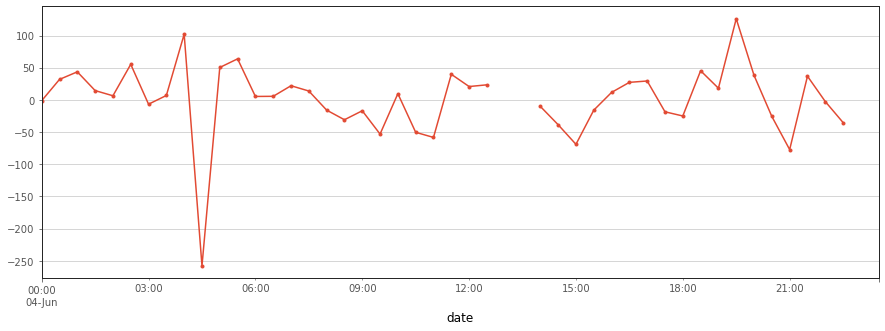

In [11]:
df.loc['2022-06-04', 'FCH4'].plot()

# JUNK

In [4]:
# TODO read from google drive
# path = os.path.join(os.getcwd(), '/7500-IU/20220524/raw/2022/05/')
# path = './7500-IU/06092022/raw/'
path = './processed/'

In [125]:
extract_ghg(path = './7500-IU/06162022')

['./7500-IU/06162022/raw/2022/06/2022-06-12T073000_AIU-2189.ghg', './7500-IU/06162022/raw/2022/06/2022-06-09T200000_AIU-2189.ghg', './7500-IU/06162022/raw/2022/06/2022-06-13T190000_AIU-2189.ghg', './7500-IU/06162022/raw/2022/06/2022-06-15T213000_AIU-2189.ghg', './7500-IU/06162022/raw/2022/06/2022-06-14T050000_AIU-2189.ghg', './7500-IU/06162022/raw/2022/06/2022-06-12T143000_AIU-2189.ghg', './7500-IU/06162022/raw/2022/06/2022-06-15T103000_AIU-2189.ghg', './7500-IU/06162022/raw/2022/06/2022-06-10T203000_AIU-2189.ghg', './7500-IU/06162022/raw/2022/06/2022-06-14T190000_AIU-2189.ghg', './7500-IU/06162022/raw/2022/06/2022-06-11T033000_AIU-2189.ghg', './7500-IU/06162022/raw/2022/06/2022-06-10T083000_AIU-2189.ghg', './7500-IU/06162022/raw/2022/06/2022-06-12T020000_AIU-2189.ghg', './7500-IU/06162022/raw/2022/06/2022-06-11T083000_AIU-2189.ghg', './7500-IU/06162022/raw/2022/06/2022-06-11T120000_AIU-2189.ghg', './7500-IU/06162022/raw/2022/06/2022-06-09T143000_AIU-2189.ghg', './7500-IU/06162022/raw/

In [6]:
# aggregate fluxnet output files
filepaths = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.csv'):
            if file.__contains__('eddypro_atmos_fluxnet'):
                filepaths.append(os.path.join(root, file))
# [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser("~/files")) for f in fn]
filepaths[0]
filepaths

['./processed/20220618/eddypro_atmos_fluxnet_2022-06-18T172802_exp.csv',
 './processed/20220611/eddypro_atmos_fluxnet_2022-06-11T163137_exp.csv']

In [32]:
# aggregate full output files
filepaths = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.csv'):
            if file.__contains__('eddypro_atmos_full_output'):
                filepaths.append(os.path.join(root, file))
# [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser("~/files")) for f in fn]

filepaths.sort()

filepaths[0]
filepaths

['./processed/20220611/eddypro_atmos_full_output_2022-06-11T163137_exp.csv',
 './processed/20220618/eddypro_atmos_full_output_2022-06-18T172802_exp.csv']

In [6]:
def r(i):
    return pd.read_csv(i, header=0)

# df = pd.read_csv(filepaths[0])
df = pd.concat(map(r, filepaths[:]))

In [33]:
def r(i):
    return pd.read_csv(i, header=0, skiprows=[0,2])

# df = pd.read_csv(filepaths[0])
df = pd.concat(map(r, filepaths[:]))

## Aggregate all data files from one directory

In [24]:
# path = os.path.join(os.getcwd(), '/7500-IU/20220524/raw/2022/05/')
path = './7500-IU/20220524/raw/2022/05/'

In [27]:
filepaths_ghg = [f for f in os.listdir(path) if f.endswith('.ghg')]
# filepaths_ghg

In [17]:
os.getcwd()

'/home/otto/data/atmos-flux-data'

In [35]:
fn = filepaths_ghg[1]
fn

'2022-05-24T043000_AIU-2189.ghg'

In [36]:
fp = os.path.join(path, fn)

In [40]:
for fn in filepaths_ghg:
    fp = os.path.join(path, fn)
    with zipfile.ZipFile(fp, "r") as zip_ref:
        zip_ref.extractall(os.path.splitext(fp)[0])

In [49]:
filePathList = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.csv'):
            if file.__contains__('eddypro_exp_fluxnet'):
                filePathList.append(os.path.join(root, file))
# [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser("~/files")) for f in fn]
filePathList

['./7500-IU/20220524/raw/2022/05/2022-05-23T223000_AIU-2189/eddypro/eddypro_exp_fluxnet_2022-05-23T230057_exp.csv',
 './7500-IU/20220524/raw/2022/05/2022-05-24T010000_AIU-2189/eddypro/eddypro_exp_fluxnet_2022-05-24T013048_exp.csv',
 './7500-IU/20220524/raw/2022/05/2022-05-23T130000_AIU-2189/eddypro/eddypro_exp_fluxnet_2022-05-23T133055_exp.csv',
 './7500-IU/20220524/raw/2022/05/2022-05-23T220000_AIU-2189/eddypro/eddypro_exp_fluxnet_2022-05-23T223052_exp.csv',
 './7500-IU/20220524/raw/2022/05/2022-05-24T043000_AIU-2189/eddypro/eddypro_exp_fluxnet_2022-05-24T050052_exp.csv',
 './7500-IU/20220524/raw/2022/05/2022-05-23T210000_AIU-2189/eddypro/eddypro_exp_fluxnet_2022-05-23T213055_exp.csv',
 './7500-IU/20220524/raw/2022/05/2022-05-23T213000_AIU-2189/eddypro/eddypro_exp_fluxnet_2022-05-23T220054_exp.csv',
 './7500-IU/20220524/raw/2022/05/2022-05-24T030000_AIU-2189/eddypro/eddypro_exp_fluxnet_2022-05-24T033103_exp.csv',
 './7500-IU/20220524/raw/2022/05/2022-05-24T000000_AIU-2189/eddypro/eddy

In [42]:
filepaths = [f for f in os.listdir('./7500-IU/20220524/raw/2022/05/') if f.endswith('.csv')]
filepaths

[]

In [81]:
df = (df.replace(-9999, np.nan)
        .assign(date = lambda x: pd.to_datetime(x['TIMESTAMP_START'],
                                                format='%Y%m%d%H%M'))
        .set_index('date')
        .sort_index()
     )